## Preprocessing pipeline

### employ an intelligent preprocessor depending on type of document. 

1. If Dialogue based document : 
    a. bnc_spoken : Do nothing (sentence split by dialgoues already)
2. If wiki/info based document : Document specific split vs Semantic splitting 

### Document analysis

In [5]:
import nltk
import matplotlib.pyplot as plt
from nltk.util import ngrams
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#import data
def read_text_from_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    return text
text_bnc_spoken = read_text_from_file("/Users/krishnaiyer/generative-ai-research-babylm/data/raw/train_10M/open_subtitles.train")

In [ ]:
#frequency distribution of words
tokens = nltk.word_tokenize(text_bnc_spoken)
freq_dist = nltk.FreqDist(tokens)

In [28]:

def plot_distribution(tokens,n,type="words"):
    # Calculate word frequencies
    freq_dist = nltk.FreqDist(tokens)

    top_words = freq_dist.most_common(n)

    # Extract words and frequencies
    words = [word[0] for word in top_words]
    frequencies = [freq[1] for freq in top_words]
    
    if type is not "words":
        str_words=[str(i) for i in words]
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(str_words, frequencies)
    plt.title(f"Top {n} Most Common {type}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/_q/69sw7_3x3f50sjr0d6s1clgc0000gn/T/ipykernel_15889/2751169631.py:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if type is not "words":


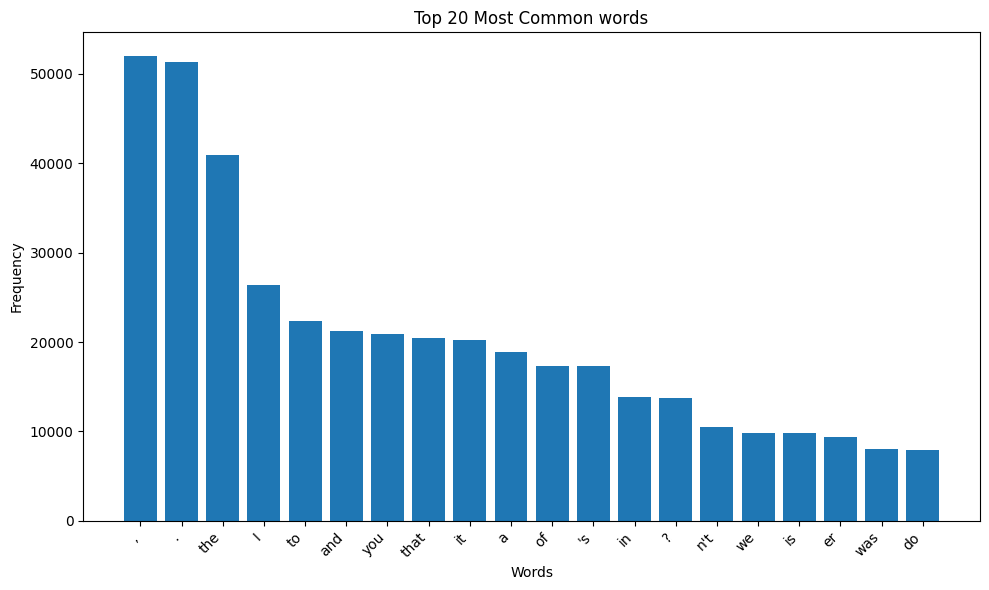

In [17]:
plot_distribution(tokens,20)

In [10]:
corpus_size = len(text_bnc_spoken)
vocab_size = len(freq_dist)
print("Corpus Size:", corpus_size)
print("Vocabulary Size:", vocab_size)

Corpus Size: 4883879
Vocabulary Size: 24634


In [20]:
#ngram analysis

# Function to generate n-grams from tokens
def generate_ngrams(text, n):
    return list(ngrams(text, n))

# Generate unigrams, bigrams, and trigrams
unigrams = generate_ngrams(tokens, 1)
bigrams = generate_ngrams(tokens, 2)
trigrams = generate_ngrams(tokens, 3)

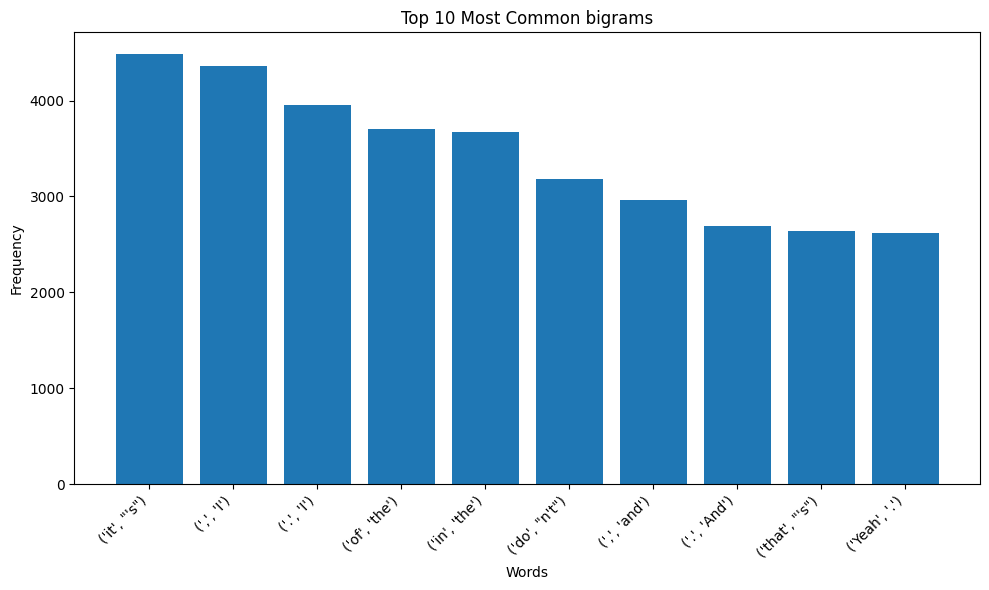

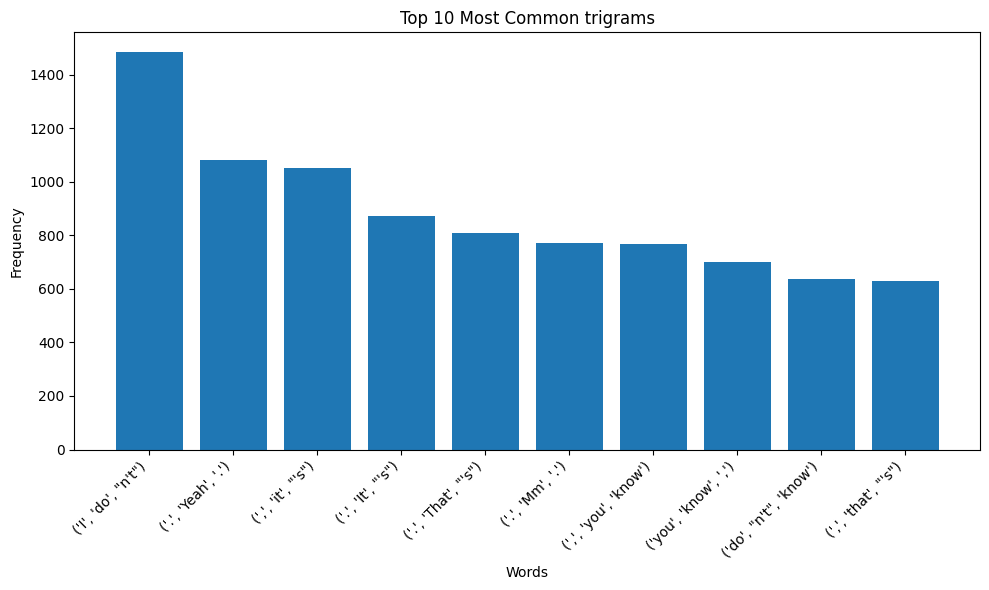

In [30]:
plot_distribution(bigrams,10,"bigrams")
plot_distribution(trigrams,10,"trigrams")

In [46]:
#text length distribution
def document_length_distribution(corpus,method="default"):
    if method == "default":
        doc_lengths = [len(doc) for doc in nltk.sent_tokenize(corpus)]
    else:
        raise ValueError("Invalid method. Please choose 'default'.")
    doc_indices = np.arange(len(doc_lengths))
    # Calculate mean and standard deviation
    mean_length = np.mean(doc_lengths)
    std_dev = np.std(doc_lengths)
    # Plot document length distribution
    plt.figure(figsize=(10, 6))
    plt.bar(doc_indices, doc_lengths,color='blue',label=f'Mean: {mean_length:.2f}\nStd Dev: {std_dev:.2f}')
    plt.title("Document Length Distribution")
    plt.xlabel("Document Length")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

/Users/krishnaiyer/miniforge3/envs/baby-lm/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


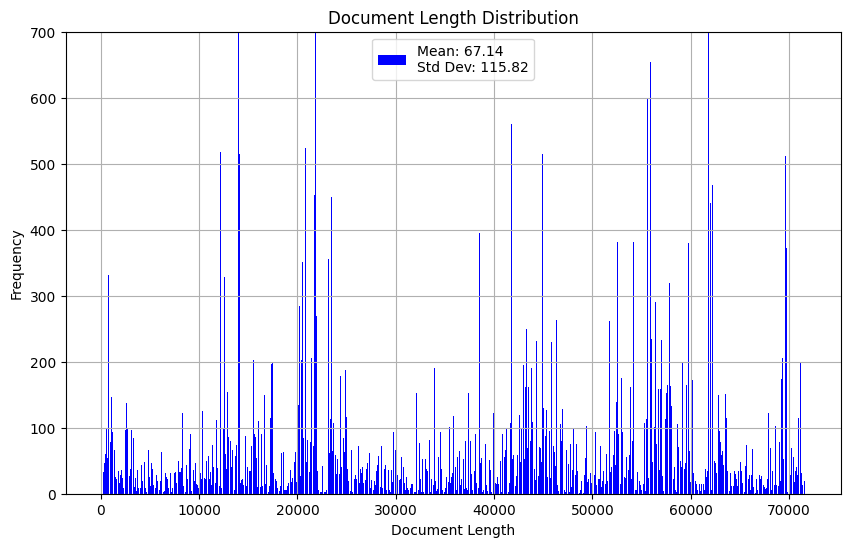

In [47]:
document_length_distribution(text_bnc_spoken)

### Recursive character splitting 
Split based on "\n", "\n\n", spaces or specific characters

In [14]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [15]:
text_bnc_spoken="""
Yeah.
Compound's things like six nine, six nine erm 
Nine twelve 
Yeah.
That sort of stuff.
At the top.
That's the top number.
Erm.
And compound is three four.
Tha that's comp that's compound.
Now compound is always six.
Oh.
Simple is just ordinary three beats a bar,
Yeah.
four beats in a bar, two beats in a bar.
It's the compou think of compound as being the one that's more difficult to think about.
Six eight times, nine eight times.
Yeah.
Right.
Still leaves three two three or four beats in a bar, but they're compound times.
They're dotted beats.
That's really all that compound means.
It means dotted beats.
Erm  what would twelve  twelve four?
Think about twelve four cos that's a compound time.
It's got twelve at the top.
Erm it may help to look at it.
Cos you can't think about it straight away.
Think  twelve, and it'll be twelve what?
Dotted semi-quavers.
No.
What does four stand for in an ordinary time signature?
Oh crotchets.
Right so 
So.
if there are twelve of those.
Twelve crotchets.
One two three four five six seven eight nine ten eleven twelve.
Think of them in groups of threes  and that gives you four  dotted?
Quavers.
No.
Semi-quavers.
You're, you're going small
Yes.
and you've got to go the other way.
Oh yeah.
It's erm
If there are tw if there are twelve crotchets and each of those are in groups of three.
Dotted minims.
So you've got four dotted minims.
"""

In [17]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 90,
    chunk_overlap = 0
)

In [21]:
text_bnc_spoken_split = text_splitter.create_documents([text_bnc_spoken])

In [23]:
[doc.page_content for doc in text_bnc_spoken_split]

["Yeah.\nCompound's things like six nine, six nine erm \nNine twelve \nYeah.",
 "That sort of stuff.\nAt the top.\nThat's the top number.\nErm.\nAnd compound is three four.",
 "Tha that's comp that's compound.\nNow compound is always six.\nOh.",
 'Simple is just ordinary three beats a bar,\nYeah.\nfour beats in a bar, two beats in a bar.',
 "It's the compou think of compound as being the one that's more difficult to think about.",
 'Six eight times, nine eight times.\nYeah.\nRight.',
 "Still leaves three two three or four beats in a bar, but they're compound times.",
 "They're dotted beats.\nThat's really all that compound means.\nIt means dotted beats.",
 "Erm  what would twelve  twelve four?\nThink about twelve four cos that's a compound time.",
 "It's got twelve at the top.\nErm it may help to look at it.",
 "Cos you can't think about it straight away.\nThink  twelve, and it'll be twelve what?",
 'Dotted semi-quavers.\nNo.\nWhat does four stand for in an ordinary time signature?',
 

In [145]:
len(text_bnc_spoken.split('\n'))

90001

### Semantic-based splitting

I started at the first sentence, got the embedding, then compared it to sentence #2, then compared #2 and #3 and so on. I was looking for "break points" where embedding distance was large. If it was above a threshold, then I considered it the start of a new semantic section. I originally tried taking embeddings of every sentence, but this turned out to be too noisy. So I ended up taking groups of 3 sentences (a window), then got an embedding, then dropped the first sentence, and added the next one. This worked out a bit better.

In [46]:
text_bnc_spoken = read_text_from_file("/Users/krishnaiyer/generative-ai-research-babylm/data/raw/train_10M/open_subtitles.train")

In [47]:
text_bnc_spoken.split("\n")

['All the way up to the free states.',
 "Good thinkin', Huck.",
 'Why, thank you,Jim.',
 "- Here's some more wood,Jim.",
 '- Right there.',
 "Tryin' to get this fire goin'.",
 'Come on, Duke! ',
 'Over here!',
 "Why are you always stealing' chickens ?",
 'I love chickens.',
 "They're succulent.",
 "- We're chicken thieves !",
 "That's as low as it gets.",
 "- Shut up and keep runnin' !",
 "It seems to me,Jim, whenever anybody's after anybody, it's usually me they's after.",
 "Hello there, we's in need of assist !",
 "- Let's get !",
 '- You bet !',
 'Grab the oars !',
 '- Hold up !',
 "I'm right behind you, Duke !",
 '- Come on, push off!',
 'Huh?',
 'What the--',
 'Hey !',
 'Get your own raft !',
 '- Thank you, lads. ',
 "We'd be obliged.",
 "- Thanks, nothin' !",
 "- You was gonna hightail out and just leave us, wasn't ya ?",
 "- No, I weren't. ",
 'Honest.',
 '- Please, sir.',
 "- If ya don't let the boy go, how's he gonna save our hides ?",
 'Sorry, boy.',
 "People tryin' to kill m

In [41]:
sentence_list = nltk.sent_tokenize(text_bnc_spoken)
print(f"Number of sentence found: {len(sentence_list)}")

Number of sentence found: 10784


In [42]:
sentences = [{'sentence':x,'index':i} for i,x in enumerate(sentence_list)]

In [32]:
sentences[:3]

[{'sentence': 'Yeah.', 'index': 0},
 {'sentence': "Compound's things like six nine, six nine erm \nNine twelve \nYeah.",
  'index': 1},
 {'sentence': 'That sort of stuff.', 'index': 2}]

In [43]:
#combining sentences with a sliding window = 1
def combine_sentences(sentences, buffer_size=1):
    # Go through each sentence dict
    for i in range(len(sentences)):
        # Create a string that will hold the sentences which are joined
        combined_sentence = ''
        
        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i] ['sentence']
        
        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined
                combined_sentence += ' ' + sentences[j]['sentence']
        
        #then add everything to your dict
        sentences[i]['combined_sentence'] = combined_sentence
    return sentences
sentences = combine_sentences(sentences)

In [10]:
from langchain.embeddings import HuggingFaceBgeEmbeddings
model_name = "BAAI/bge-large-en-v1.5"
encode_kwargs = {'normalize_embeddings': True}
embedding_model = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    encode_kwargs=encode_kwargs,
)

/Users/krishnaiyer/miniforge3/envs/baby-lm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
from tqdm import tqdm

In [44]:
for x in tqdm(sentences):
    embeddings = embedding_model.embed_documents(x['combined_sentence'])


  1%|          | 60/10784 [00:20<1:01:37,  2.90it/s]


KeyboardInterrupt: 

In [105]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]

In [106]:
def calculate_cosine_distances (sentences) :
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences [i] ['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        # Convert to cosine distance
        distance = 1 - similarity
        # Append cosine distance to the list
        distances.append(distance)
        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance
        # Optionally handle the last sentence
        # sentences|-1]['distance_to_next'] = None # or a default value
    return distances, sentences

In [107]:
distances, sentences = calculate_cosine_distances(sentences)

Text(0.5, 1.0, 'Cosine Distances between rolling windowed sentences')

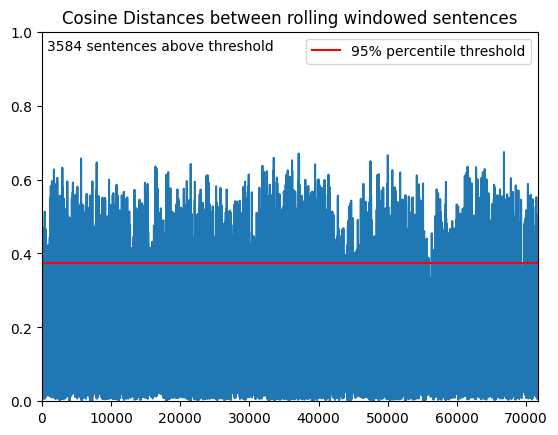

In [125]:
plt.plot(distances)
plt.ylim(0,1)
plt.xlim(0,len(distances))

#get distance threshold for where to split 
percentile_threshold = 95
distance_threshold = np.percentile(distances,percentile_threshold)
plt.axhline(y=distance_threshold,color='r',linestyle='-',label='95% percentile threshold')

#how many break points above the threshold
num_breaks = len([x for x in distances if x > distance_threshold])
plt.text(x=(len(distances)*0.01),y=0.95,s=f"{num_breaks} sentences above threshold")

#indices of distances above the threshold
indices_above_thresh = [i for i,x in enumerate(distances) if x > distance_threshold]

plt.legend()
plt.title("Cosine Distances between rolling windowed sentences")

In [126]:
start_index = 0
chunks = []
# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is one less than the current breakpoint
    end_index = index - 1
    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    start_index = index

if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

In [137]:
chunks

["Yeah. Compound's things like six nine, six nine erm \nNine twelve \nYeah. That sort of stuff. At the top. That's the top number. Erm. And compound is three four. Tha that's comp that's compound. Now compound is always six. Oh. Simple is just ordinary three beats a bar,\nYeah. four beats in a bar, two beats in a bar. It's the compou think of compound as being the one that's more difficult to think about. Six eight times, nine eight times.",
 "Yeah. Right. Still leaves three two three or four beats in a bar, but they're compound times. They're dotted beats. That's really all that compound means. It means dotted beats. Erm  what would twelve  twelve four? Think about twelve four cos that's a compound time. It's got twelve at the top. Erm it may help to look at it. Cos you can't think about it straight away. Think  twelve, and it'll be twelve what? Dotted semi-quavers. No. What does four stand for in an ordinary time signature? Oh crotchets. Right so \nSo. if there are twelve of those. T

In [134]:
len(text_splitter.create_documents(chunks))

63534

In [136]:
len(text_bnc_spoken)

4883879

In [12]:
text_splitter.create_documents(chunks)

NameError: name 'text_splitter' is not defined

### Preprocessing different files

In [1]:
import re

In [2]:
def remove_speaker_labels(line):
    """
    Remove speaker labels from a line of text.
    """
    if ':' in line:
        return line.split(':', 1)[1].strip()
    return line

def remove_section_headers(text):
    """
    Remove text between and including the patterns '= = =' from the text.
    """
    cleaned_text = []
    skip = False
    for line in text.splitlines():
        if '= = =' in line:
            skip = not skip
            continue
        if not skip:
            cleaned_text.append(line)
    return '\n'.join(cleaned_text)

def process_text_file(file_path):
    """
    Process the text file to remove unwanted parts and format it as required.
    """
    with open(file_path, 'r') as file:
        content = file.read()

    # Remove section headers
    content = remove_section_headers(content)

    # Process each line to remove speaker labels
    processed_lines = [remove_speaker_labels(line) for line in content.splitlines() if line.strip()]
    processed_lines = '\n'.join(processed_lines)
    # Join the lines back into a single string
    return processed_lines

def main():
    file_path = '/Users/krishnaiyer/generative-ai-research-babylm/data/raw/train_10M/switchboard.train'  # Update this to the path of your text file
    processed_text = process_text_file(file_path)
    print(processed_text)

if __name__ == "__main__":
    main()

I'm sure they are.
That's right,
I'm sure that true.
It's a lot different than working in a kids preschool.
A lot different.
That's right.
Well, you all have a nice day there.
You too,
and thank you for calling.
Thank you very much.
Uh-huh.
Bye-bye.
Bye.
Do you have any?
Sure.
I have a Springer Spaniel,
and her name is Thumper.
She's about seven or eight years old.
I got her for Christmas from my family, and, uh, back when we lived in Nebraska.
I like to hunt,
and, uh, so, I thought that if I had a good hunting dog like Thumper that, boy, I could just go out and get all kinds of game
Did it work?
Yeah,
except we live in Plano, Texas now
No,
right.
so
I, um, I had a, for many years I had a dog that was part Springer Spaniel.
I just love them.
Her name was Molly,
but she isn't alive any more
We had her for, um, fifteen years, I think, my family did, and just loved her.
She was the greatest, greatest, um, went through two generations of children in my family and was always very gentle.
Do

In [ ]:
import langchain_community